In [1]:
import sys
import os
import shutil
import time
import re
import numpy as np
import matplotlib.pyplot as plt
from hyperparameters import *

import torch
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision import transforms as T

from data_manager import rgbd_gradients_dataset, rgbd_gradients_dataloader
from functions import torch2np_u8
import plot
import gardients_to_navigation
from lines_utils import get_line

np.set_printoptions(threshold=sys.maxsize)
%matplotlib notebook

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [3]:
CWD             = os.getcwd()
DATASET_DIR     = os.path.join(CWD,'data/nyuv2')
print(DATASET_DIR)

C:\Users\tomav\Documents\GitHub\cs236781-project\data/nyuv2


In [4]:
rgbd_grads_ds = rgbd_gradients_dataset(root=DATASET_DIR, use_transforms=True)

In [5]:
# _ = plot.rgbd_gradients_dataset_first_n(dataset=rgbd_grads_ds,n=2)
# print(f'Found {len(rgbd_grads_ds)} images in dataset folder.')

<IPython.core.display.Javascript object>


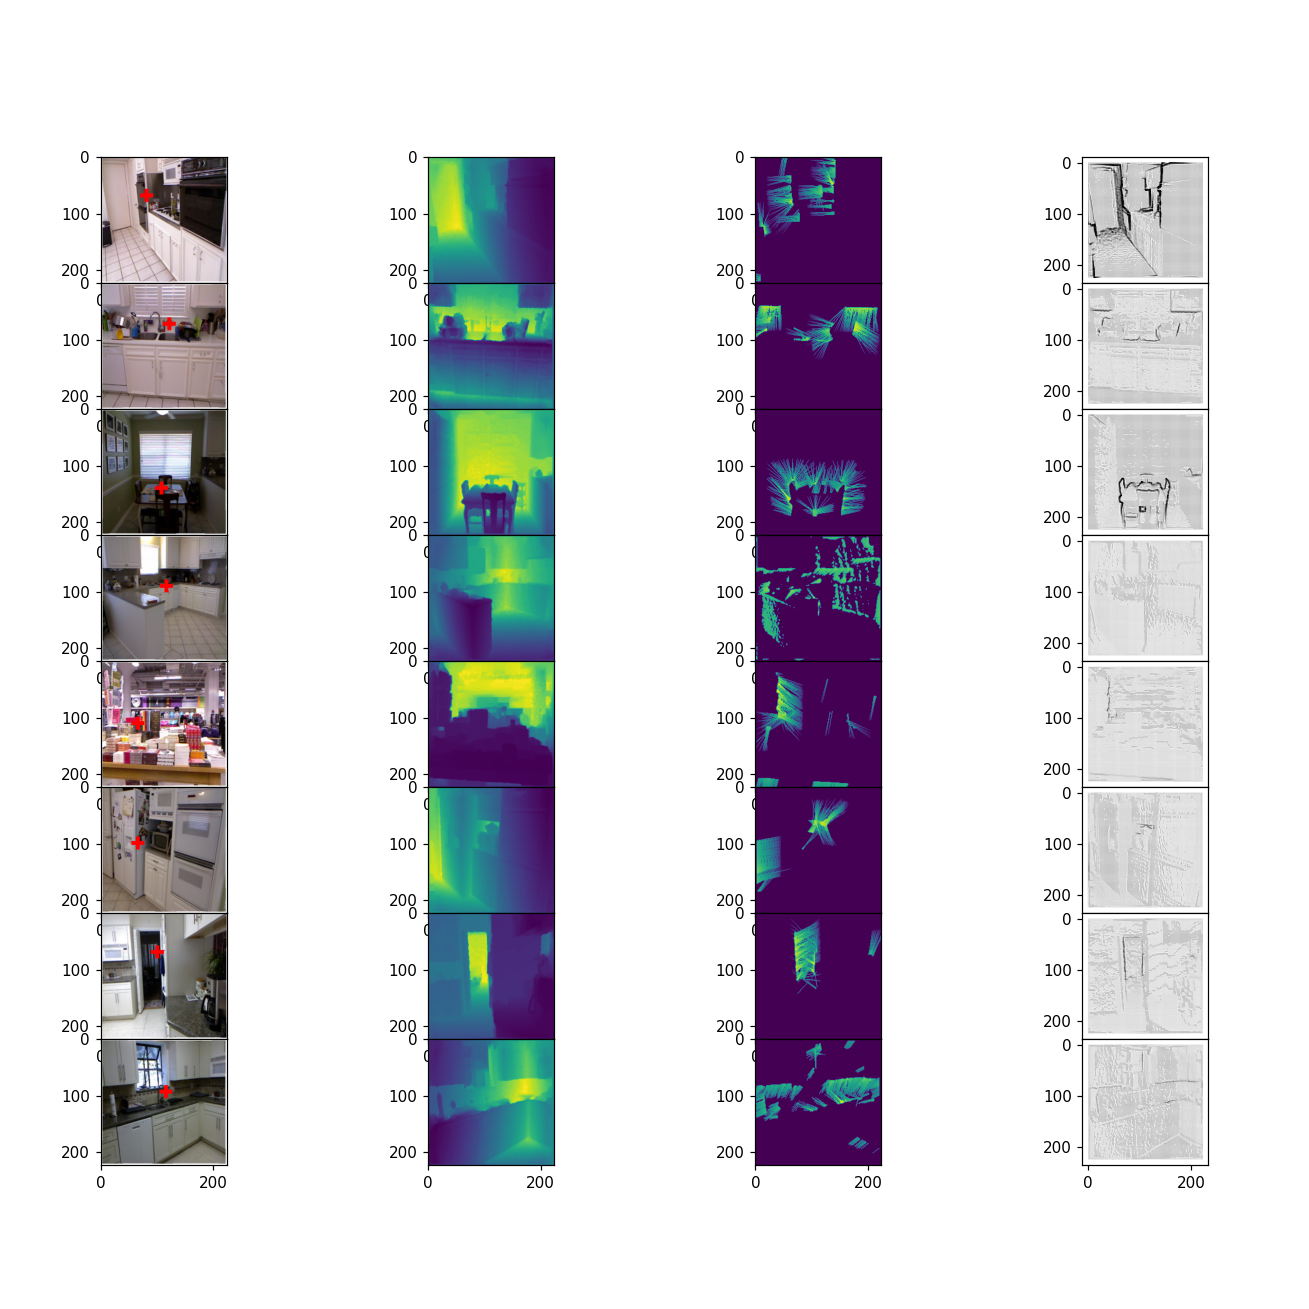

In [6]:
_ = gardients_to_navigation.rgbd_gradients_dataset_first_n(dataset=rgbd_grads_ds,n=8, random_start=True)

In [7]:
dl_train,dl_test = rgbd_gradients_dataloader(root=DATASET_DIR,
                                             use_transforms=True)

In [8]:
sample_batch = next(iter(dl_test))
print(sample_batch.keys())
print('rgb: <shape>=', sample_batch['rgb'].shape, 
      ' <min>=',       sample_batch['rgb'].min(),
      ' <max>=',       sample_batch['rgb'].max(),
      ' <mean>=',      sample_batch['rgb'].mean(), 
      ' <std>=',       sample_batch['rgb'].std())
print('depth: <shape>=', sample_batch['depth'].shape,
      ' <min>=',         sample_batch['depth'].min(),
      ' <max>=',         sample_batch['depth'].max(),
      ' <mean>=',        sample_batch['depth'].mean(),
      ' <std>=',         sample_batch['depth'].std())
print('x: <shape>=', sample_batch['x'].shape, 
      ' <min>=',     sample_batch['x'].min(),
      ' <max>=',     sample_batch['x'].max(),
      ' <mean>=',    sample_batch['x'].mean(),
      ' <std>=',     sample_batch['x'].std())
print('y: <shape>=', sample_batch['y'].shape, 
      ' <min>=',     sample_batch['y'].min(),
      ' <max>=',     sample_batch['y'].max(),
      ' <mean>=',    sample_batch['y'].mean(),
      ' <std>=',     sample_batch['y'].std())

dict_keys(['rgb', 'depth', 'x', 'y'])
rgb: <shape>= torch.Size([4, 3, 224, 224])  <min>= tensor(-1.)  <max>= tensor(1.)  <mean>= tensor(-0.0113)  <std>= tensor(0.4824)
depth: <shape>= torch.Size([4, 1, 224, 224])  <min>= tensor(-1.)  <max>= tensor(0.9922)  <mean>= tensor(0.0085)  <std>= tensor(0.5622)
x: <shape>= torch.Size([4, 1, 224, 224])  <min>= tensor(-1.)  <max>= tensor(1.)  <mean>= tensor(0.0896)  <std>= tensor(0.1368)
y: <shape>= torch.Size([4, 1, 224, 224])  <min>= tensor(-1.)  <max>= tensor(1.)  <mean>= tensor(0.2274)  <std>= tensor(0.1396)


In [9]:
print('Measure batch generation time:')
times = []
start = time.time()
for i, _ in enumerate(dl_train):   
    end = time.time()
    times.append(end-start)
    start = time.time()
print(sum(times)/len(times))

Measure batch generation time:
0.03867211577656505
